Name: Jonathan Park <br>
Date: 2022.04.03

# Project Shappify: Data Cleaning and EDA Part 1
***

## Problem and Value Statements

The goals of this capstone project is to identify the words predictive of sentiment (sentiment analysis) and identify the different topics that these reviews contain (topic modeling) so that I can automate the process of gathering and directing high-quality feedback to relevant stakeholders in order to optimize the overall user experience for Shopify's app store users/merchants.

## Introduction

Outlined in this notebook are the general steps I took for gathering, inspecting, and cleaning the data prior to implementing natural language processing (NLP) techniques. This step is critical for making certain the data quality is minimized of any noise or nonsensical data and to gain deeper insights on what the data is made up of (e.g., data types, variables, missing values).

This notebook will be organized in the following manner:

1. Data Acquisition
2. Data Preparation and Cleaning
3. Exploratory Data Analysis

The desired output from the initial cleaning process of this notebook will be a dataframe that contains the appropriate data types within the columns, removal of duplicate rows, and removal of missing values. The output will then be saved for further use in Part 2, where text pre-processing, tokenization, and vectorization of the review texts will take place.

## Getting the Data
***

The data utilized for this project was retrieved from [Kaggle](https://www.kaggle.com/usernam3/shopify-app-store?select=apps.csv). The author had conveniently laid out the data to be .csv files with details on the apps, categories, benefits, pricing plans, and reviews. Provided below is the deduced data dictionary for the output from each file.I will take a closer look at the `reviews.csv` file in the next section.

To verify the validity of the reviews dataset, 3 randomly selected apps from the dataset were chosen and the 20 of the most recent review texts (i.e., from Aug 2020) were cross-referenced with the Shopify App Store and the app’s corresponding review webpages. One discrepancy observed was that the date the review was posted on the webpage can change because of the
original author editing their review and causing an update to the review's date. This is not captured by the Kaggle dataset
(i.e., post date and last edited date are amalgamated to a single “posted date”).

Furthermore, in comparing additional aspects to the current Shopify App store webpages and the Kaggle dataset, it appears that the following are out-of-date characteristics in the Kaggle dataset:

1. There are 12 app categories are listed in the `categories.csv`. However, there are only 9 categories outlined on the Shopify App store webpage.
2. There are $\approx$ 4,700 unique app ids listed in the `apps.csv`. However, this number has grown to $\approx$ 7,200 apps in the current Shopify App store.
3. Some app names have been modified (e.g., SEO HTML Sitemap from Kaggle dataset changed to SEO HTML and XML Sitemap in the current Shopify App Store webpage).

#### Data Dictionary

A total of 7`.csv` files were from the Kaggle dataset. Of the 7, only 4 of the files were used in order to obtain the application's name and category for exploratory data analysis later in the notebook.

The type of data contained in each file is outlined below (adapted from the Kaggle dataset "Detail" section).

***

Table 1. Data Dictionary – reviews.csv 
<br>

    
| Column Name | Description |
| :--- | :--- |
| `app_id` | Unique identifier for the application or app in the dataset. |
| `author` | Name of the merchant or user that wrote the review. |
| `rating` | The rating given to the app by the author in the form of stars. Ranging from 1 to 5, with 5 being the highest. |
| `posted_at`(renamed to `review_date`) | The date that the review was first posted OR the data that it was last edited. |
| `body` (renamed to `review_text`) | The text of the review. |
| `helpful_count` | The total number of "thumbs up" that the community of users can give in relation to whether the review helped them, if available. |
| `developer_reply` (renamed to `dev_reply_text`) | The text of the app developer's response, if available. |
| `developer_reply_posted_at` (renamed to `dev_reply_date`) | The date of the app developer's response, if available. |
   
<br>

***

Table 2. Data Dictionary – apps.csv 
<br>
    

|Column Name|Description|
|:---|:---|
|`id` (renamed to `app_id`)| Unique identifier for the app. |
|`url`| The URL link to the application on the Shopify App store. |
|`title` (renamed to `app_name`)| The name of the app. |
|`developer`| The name of the application developer. |
|`developer_link`| The link to the application developer's parter page on Shopify that also lists the other applications the developer has created. |
|`icon`| A URL to the application's image icon observed in the app's description. |
|`rating`| Average rating of the application from the reviews received-to-date. |
|`reviews_count`| Total number of reviews received-to-date. |
|`description_raw`| The app's description with HTML tags not parsed. |
|`description`| Description of the app. |
|`tagline`| App's tagline. |
|`pricing_hint`| Pricing details of the application.  |
    

<br>

***

Table 3. Data Dictionary – apps_categories.csv 
<br>

    

|Column Name|Description|
|:---|:---|
|`app_id` | Unique identifier for the app. |
|`category_id`| Unique identifier for the app's category. |
    

<br>

***

Table 4. Data Dictionary – categories.csv 
<br>

    

|Column Name|Description|
|:---|:---|
|`id` (renamed to `category_id`)| Unique identifier for the app's category. |
|`title` (renamed to `category_name`)| Name of the category (12 possible categories). Note that an app can possess more than one category name. |
    


<br>

***

Table 5. Data Dictionary – pricing_plans.csv 
<br>

    

|Column Name|Description|
|:---|:---|
|`id` | Unique identifier for the app's pricing plan. |
|`app_id` | Unique identifier for the app. |
|`title`| Name of pricing option. |
|`price`| Price of subscription. |
    

<br>

***

Table 6. Data Dictionary – pricing_plan_features.csv 
<br>

    

|Column Name|Description|
|:---|:---|
|`app_id` (appears incorrect) | Unique identifier for the app's pricing plan. |
|`pricing_plan_id` (appears incorrect) | Unique identifier for the software app.  |
|`feature`| Features related to the specific app's pricing plan choices. |
    

<br>

***

Table 7. Data Dictionary – key_benefits.csv 
<br>

    
|Column Name|Description|
|:---|:---|
|`app_id` | Unique identifier for the app. |
|`title`| Key benefits of the application as outlined on the app's webpage. |
|`description`| Descriptor for the key benefit of the app. |
    

<br>

***

### Import Packages

As always, there are a list of packages I will import for this notebook.

In [1]:
# Array and dataframe manipulation libraries
import numpy as np
import pandas as pd

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

Please make sure the directory has been changed to match your folder destination.

In [2]:
# Import dataset
reviews_df = pd.read_csv('Kaggle Dataset/reviews.csv')

###  Overview of Data

I will check the top 5 rows and bottom 5 rows of the dataframe to see what the data looks like and also identify any unexpected information at the bottom of the dataframe (e.g., if any non-data related contact attached at the bottom).

In [3]:
# Print the first 5 rows
reviews_df.head()

,app_id,author,rating,posted_at,body,helpful_count,developer_reply,developer_reply_posted_at
0,b1da53a4-0474-4700-9620-bf386bc033fb,Consuela,5,"August 6, 2020",Great and super fast customer service! Highly ...,0,NaN,NaN
1,b1da53a4-0474-4700-9620-bf386bc033fb,L'Atelier Global,5,"August 4, 2020","Still setting up my store, and after initially...",0,NaN,NaN
2,b1da53a4-0474-4700-9620-bf386bc033fb,city'super E-Shop,5,"August 4, 2020","This is an excellent search app, which they ha...",0,NaN,NaN
3,b1da53a4-0474-4700-9620-bf386bc033fb,PortableHandwashing.com,5,"July 30, 2020","A+, great great great customer service! thanks...",0,NaN,NaN
4,b1da53a4-0474-4700-9620-bf386bc033fb,ICCTUNING,5,"July 28, 2020","I'm begginig to use this app, the search engin...",0,NaN,NaN


In [4]:
# Similarly, print the last 5 rows to identify if any 
# non-data related content was tacked on at the bottom (e.g., comments)
reviews_df.tail()

,app_id,author,rating,posted_at,body,helpful_count,developer_reply,developer_reply_posted_at
447312,1a4accf8-b57e-4c08-a07c-fe5db0f0a0bc,Life Force,2,"August 10, 2015",The app is cool and simple to use which I like...,0,NaN,NaN
447313,1a4accf8-b57e-4c08-a07c-fe5db0f0a0bc,Luka Inc,5,"July 16, 2015","Such a great thing, and great customer service...",0,NaN,NaN
447314,1a4accf8-b57e-4c08-a07c-fe5db0f0a0bc,Say It Forward,5,"June 29, 2015",Just found Privy! I can't wait to start recei...,0,NaN,NaN
447315,1a4accf8-b57e-4c08-a07c-fe5db0f0a0bc,Cupboard Distributing,5,"June 26, 2015","Wow, overnight got tons of new email signups a...",0,NaN,NaN
447316,1a4accf8-b57e-4c08-a07c-fe5db0f0a0bc,Pure Pleasure Shop,5,"June 25, 2015","We love Privy! Easy to use, clear call to acti...",0,NaN,NaN


Let's take this opportunity to modify the column names to a clearer description. I will modify the `posted_at`, `body`, `developer_reply` and `developer_reply_posted_at` to the following: `review_date`, `review_text`, `dev_reply`, and `dev_reply_date`, respectively.

In [5]:
reviews_df = reviews_df.rename(columns = {"posted_at":"review_date", 
                                          "body":"review_text",
                                          "developer_reply":"dev_reply_text",
                                          "developer_reply_posted_at":"dev_reply_date"})

In [6]:
reviews_df.head()

,app_id,author,rating,review_date,review_text,helpful_count,dev_reply_text,dev_reply_date
0,b1da53a4-0474-4700-9620-bf386bc033fb,Consuela,5,"August 6, 2020",Great and super fast customer service! Highly ...,0,NaN,NaN
1,b1da53a4-0474-4700-9620-bf386bc033fb,L'Atelier Global,5,"August 4, 2020","Still setting up my store, and after initially...",0,NaN,NaN
2,b1da53a4-0474-4700-9620-bf386bc033fb,city'super E-Shop,5,"August 4, 2020","This is an excellent search app, which they ha...",0,NaN,NaN
3,b1da53a4-0474-4700-9620-bf386bc033fb,PortableHandwashing.com,5,"July 30, 2020","A+, great great great customer service! thanks...",0,NaN,NaN
4,b1da53a4-0474-4700-9620-bf386bc033fb,ICCTUNING,5,"July 28, 2020","I'm begginig to use this app, the search engin...",0,NaN,NaN


Check the shape of the data frame.

In [7]:
# Shape of the dataframe
[nrows, ncols] = reviews_df.shape
print(f"The dataframe shape I am working with has {nrows} rows and {ncols} columns")

The dataframe shape I am working with has 447317 rows and 8 columns


Retrieve a brief summary of the data types and non-null count within the dataframe.

In [8]:
# Quick summary of dataframe's columns, data type, and non-null counts
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447317 entries, 0 to 447316
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   app_id          447317 non-null  object
 1   author          447193 non-null  object
 2   rating          447317 non-null  int64 
 3   review_date     447317 non-null  object
 4   review_text     447116 non-null  object
 5   helpful_count   447317 non-null  int64 
 6   dev_reply_text  47561 non-null   object
 7   dev_reply_date  47561 non-null   object
dtypes: int64(2), object(6)
memory usage: 27.3+ MB


In [9]:
reviews_df.nunique()

app_id              3733
author            299314
rating                 5
review_date         3190
review_text       441166
helpful_count         54
dev_reply_text     37262
dev_reply_date       550
dtype: int64

#### Summary
- There is approximately $\approx$ 3,700 unique `app_id`s with ratings and $\approx$ 440k reviews in total.
- There is $\approx$ 300k `author`s. It is possible that each author may have posted reviews to other apps as well.
- The `rating` and `helpful_count` columns are numeric data types; what I would expect.
- The `review_date` and `dev_reply_date` are dates and need to be converted from an object data type to datetime data type.

##  Data Preparation and Cleaning
***

I will perform the following data preparation and cleaning steps in this section:

- Fix Data Type Column
- Remove Duplicate Rows
- Remove NaNs/NaTs


### Fix Data Type Column

Next I will take the `review_date` column and convert it from an object type to a datetime data type.

In [10]:
# The dtype is an object so I want to convert it to datetime

# Take a quick peek at the dates current format
reviews_df['review_date'].head()

0    August 6, 2020
1    August 4, 2020
2    August 4, 2020
3     July 30, 2020
4     July 28, 2020
Name: review_date, dtype: object

In [11]:
# Convert to datetime data type
reviews_df['review_date'] = pd.to_datetime(reviews_df['review_date']) 

# Check to see the datatype change has been implemented
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447317 entries, 0 to 447316
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   app_id          447317 non-null  object        
 1   author          447193 non-null  object        
 2   rating          447317 non-null  int64         
 3   review_date     447317 non-null  datetime64[ns]
 4   review_text     447116 non-null  object        
 5   helpful_count   447317 non-null  int64         
 6   dev_reply_text  47561 non-null   object        
 7   dev_reply_date  47561 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 27.3+ MB


Let's get a brief overview on the range of dates the reviews were created.

In [12]:
reviews_df['review_date'].sort_values()

217750   2009-06-02
217554   2009-06-02
217536   2009-06-03
217535   2009-06-04
217520   2009-06-12
            ...    
391451   2020-08-30
367059   2020-08-30
147979   2020-08-30
38604    2020-08-30
111661   2020-08-30
Name: review_date, Length: 447317, dtype: datetime64[ns]

The reviews date back from June of 2009, approximately around the time when the Shopify App store opened, up until when the date the reviews were gathered, August 2020.

I will do the same datetime conversion for `dev_reply_date` column.

In [13]:
# Take a glimpe into dev_reply_date that contains dev responses (i.e., not NaN)
reviews_df[~reviews_df['dev_reply_date'].isna()]['dev_reply_date'].head()

30    August 25, 2020
38      June 25, 2020
43    August 17, 2020
48       June 2, 2020
71     April 23, 2020
Name: dev_reply_date, dtype: object

In [14]:
# Convert to datetime data type
reviews_df['dev_reply_date'] = pd.to_datetime(reviews_df['dev_reply_date']) 

In [15]:
# Check to see the datatype change has been implemented
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447317 entries, 0 to 447316
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   app_id          447317 non-null  object        
 1   author          447193 non-null  object        
 2   rating          447317 non-null  int64         
 3   review_date     447317 non-null  datetime64[ns]
 4   review_text     447116 non-null  object        
 5   helpful_count   447317 non-null  int64         
 6   dev_reply_text  47561 non-null   object        
 7   dev_reply_date  47561 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 27.3+ MB


I can confirm that both date columns have been converted to `datetime` data types.

Let's get a brief overview on the range of dates the developer replies occurred.

In [16]:
# Filter out the missing developer reply date values that were introduced
# when converting the column data type to datetime and then sort the dates
reviews_df['dev_reply_date'][reviews_df['dev_reply_date'].notna()].sort_values()

117706   2019-02-28
400398   2019-02-28
400384   2019-02-28
400383   2019-02-28
400368   2019-02-28
            ...    
101253   2020-08-30
45925    2020-08-30
27118    2020-08-30
27102    2020-08-30
2746     2020-08-30
Name: dev_reply_date, Length: 47561, dtype: datetime64[ns]

Interestingly, developer responses started appearing in the end of February 2019. This indicates it may have been a relatively new feature to the app store that enabled app developers to respond to app reviews.

### Remove Duplicate Rows

I will check for redundant information and remove them.

In [17]:
# Check for duplicate row data and convert the total true/false into percentage
print(reviews_df.duplicated().value_counts())
reviews_df.duplicated().value_counts(normalize = True) * 100

False    447298
True         19
dtype: int64


False    99.995752
True      0.004248
dtype: float64

Take a glimpse into the 19 duplicate rows.

In [18]:
reviews_df[reviews_df.duplicated()]

,app_id,author,rating,review_date,review_text,helpful_count,dev_reply_text,dev_reply_date
12137,daf33223-bc38-433a-a97d-55bdef98b006,locosmetic.com,5,2012-03-30,This app is really amazing. I've never realize...,0,NaN,NaT
12170,daf33223-bc38-433a-a97d-55bdef98b006,alertwine,5,2012-03-22,This App pays itself. It's great for contactin...,0,NaN,NaT
19437,d3883e47-4a47-492b-af88-6896b8ae9ac7,SmoothieBox,5,2019-05-30,ReCharge has some of the best Shopify app supp...,0,NaN,NaT
110734,c5595105-d89a-4869-99c9-7f92c2cf28a0,UPAN The Cast Iron Sausage Fry Pan,5,2020-02-25,"Great Service, if you dont see exactly what yo...",0,NaN,NaT
110754,c5595105-d89a-4869-99c9-7f92c2cf28a0,UPAN The Cast Iron Sausage Fry Pan,5,2020-02-25,"Great Service, if you dont see exactly what yo...",0,NaN,NaT
111175,7b35f515-1a6f-4324-87a9-0a81318478b1,Vaso Roto,1,2019-03-11,"La app dejó de funcionar, no deja abrir ningún...",0,NaN,NaT
131583,2bb4f15f-8a1e-4c51-a837-b7ca306c55e6,Fo Shizzle My Fizzle,1,2020-07-09,"Hate to say it, but this is absolute garbage. ...",0,Thank you for sharing your feedback. I'd like ...,2020-08-04
144473,2a67b721-009c-472e-b25c-5d2ba2ba8953,ourCommonplace,5,2020-06-22,Great app and good support. Would recommend to...,0,NaN,NaT
146178,238bea68-28c8-4623-8bc5-2053ff218e96,Original Oil & Acrylic Paintings by The Painti...,5,2013-02-27,Great app! Really quick and easy to use. Alex ...,0,NaN,NaT
168663,00ad6b55-3a26-42be-a185-ca3bf2a361dc,Best Branding,5,2014-04-05,"Product Options is a fantastic app, it offers ...",0,NaN,NaT


I observed a very small number ofthe dataset contains duplicate rows. I will remove them and then check the new shape of the dataframe to confirm the changes are made.

In [19]:
# By default, all duplicates are dropped except the first occurrence.
reviews_df.drop_duplicates(inplace=True)

# Reset the index values of the dataframe to account for all the data
# cleaning in the previous steps
reviews_df = reviews_df.reset_index(drop = True)

In [20]:
# Shape of the NEW dataframe
[nrows_new, ncols_new] = reviews_df.shape
print(f"The NEW dataframe shape I am working with now has {nrows_new} rows and {ncols_new} columns")

The NEW dataframe shape I am working with now has 447298 rows and 8 columns


In [21]:
# Confirm I have no more duplicated row values
print(f"The NEW dataframe has {reviews_df.duplicated().sum()} number of duplicated rows")

The NEW dataframe has 0 number of duplicated rows


### Remove NaN/NaT values

Let's now check for `NaN` and `NaT` values. Note that `NaT` values were introduced as a result of the `datetime` data type conversion. `NaT` refer to missing dates.

In [22]:
# Total number of NaN/NaT values in the dataframe
nan_df = pd.DataFrame(reviews_df.isna().sum(), columns = {"nan_count"})
nan_df['nan_percent'] = round(nan_df['nan_count'] / len(reviews_df) * 100, 2)
nan_df

,nan_count,nan_percent
app_id,0,0.00
author,124,0.03
rating,0,0.00
review_date,0,0.00
review_text,201,0.04
helpful_count,0,0.00
dev_reply_text,399738,89.37
dev_reply_date,399738,89.37


By calculating the proportions of `NaN` and `NaT` values in their corresponding columns:

- I observe trivial proportions of `author` and `review_text` are empty.
- Approximately $\approx$ 89% of reviews do not have a developer response. I will explore this further in the next section.

Since I am interested in using the `review_text` as features for downstream sentiment analysis and topic modeling, I will remove/drop the rows with `NaN` in the `review_text` column.

In [23]:
# Quick glimpse of the rows with empty or NaN review_text cells
reviews_df[reviews_df['review_text'].isna()].head()

,app_id,author,rating,review_date,review_text,helpful_count,dev_reply_text,dev_reply_date
627,b13f9c06-c950-419e-ab51-a8b73cd55738,avatar.do,4,2020-07-14,NaN,0,NaN,NaT
1305,b1f0bd7c-6268-43c6-9d9e-7115ae50f867,Dispenser Station,4,2020-06-26,NaN,0,NaN,NaT
1620,9e3be138-3e6b-4f0b-b6d3-18d13dc53758,Limitedparis,5,2018-04-21,NaN,0,NaN,NaT
2978,94e77128-9474-4076-b4a1-2ac6b880c8f3,Zofikira,3,2019-05-29,NaN,0,NaN,NaT
3498,4d6ae242-2891-4581-b120-f374bbbb8def,Gift Rebellion,3,2018-06-15,NaN,0,NaN,NaT


In [24]:
# Remove NaN rows based on review_text NaNs
nan_index = reviews_df[reviews_df['review_text'].isna()].index

# Drop the NaN rows
reviews_df.drop(nan_index, inplace = True)

# Reset the index of the dataframe
reviews_df.reset_index(drop = True, inplace = True)

In [25]:
# Total number of NaN values in the dataframe
nan_df = pd.DataFrame(reviews_df.isna().sum(), columns = {"nan_count"})
nan_df['nan_percent'] = round(nan_df['nan_count'] / len(reviews_df) * 100, 4)
nan_df

,nan_count,nan_percent
app_id,0,0.0000
author,124,0.0277
rating,0,0.0000
review_date,0,0.0000
review_text,0,0.0000
helpful_count,0,0.0000
dev_reply_text,399555,89.3665
dev_reply_date,399555,89.3665


I have removed all the rows with `NaN` in the `review_text` column.

Let's now investigate the `NaN` counts for the `author` column. I will take a quick glimpse below.

In [26]:
# Quick glimpse of the rows with empty or NaN author cells
reviews_df[reviews_df['author'].isna()]

,app_id,author,rating,review_date,review_text,helpful_count,dev_reply_text,dev_reply_date
12168,daf33223-bc38-433a-a97d-55bdef98b006,NaN,5,2011-12-15,Wow these guys are awesome. Not only does this...,0,NaN,NaT
12169,daf33223-bc38-433a-a97d-55bdef98b006,NaN,5,2011-12-12,Exactly what we have been looking for and Aban...,0,NaN,NaT
12179,daf33223-bc38-433a-a97d-55bdef98b006,NaN,5,2011-12-05,Abandon App has been a great addition to our S...,0,NaN,NaT
12270,daf33223-bc38-433a-a97d-55bdef98b006,NaN,5,2011-12-05,A great app. Must have plugin for any Shopify ...,0,NaN,NaT
12282,daf33223-bc38-433a-a97d-55bdef98b006,NaN,5,2011-11-13,I will be perfectly honest i installed this ap...,0,NaN,NaT
...,...,...,...,...,...,...,...,...
358481,6dd7f731-ee55-4533-9874-55c1d197b245,NaN,5,2011-07-10,This plugin quickly identified an easy issue t...,0,NaN,NaT
358502,6dd7f731-ee55-4533-9874-55c1d197b245,NaN,4,2011-06-19,Awesome application for non expert SEO users!,0,NaN,NaT
358503,6dd7f731-ee55-4533-9874-55c1d197b245,NaN,5,2011-06-15,Easy to install and works great. Identified a...,0,NaN,NaT
374719,24703d6c-dfdf-4ab9-ac8d-f5ebb65bd434,NaN,4,2011-02-23,I can't believe how easy that is! Great back-e...,0,NaN,NaT


Out of curiosity, I want to check the year that missing review_text cells are from for any particular pattern.

In [27]:
# Quick glimpse of the rows with empty or NaN author cells and their
# corresponding years out of curiosity
reviews_df[reviews_df['author'].isna()].review_date.dt.year.value_counts()

2011    82
2010    19
2009    12
2012    10
2019     1
Name: review_date, dtype: int64

These rows do not appear to be exclusive to a particular year.

Despite the missing `author` name for the rows of data, I see that it still contains some `review_text`. One option can be to preserve these rows of data since they contain `review_text` data that can be used for downstream analysis and the author of the reviews may have chosen to be anonymous about it. However, I will drop these rows since the number of rows with `NaN` in the `author` column are $\approx$ 0.03% of the total data. 

In [28]:
## Optional removal of rows with missing author values ##

# Remove NaN rows based on 'author' NaNs
nan_index = reviews_df[reviews_df['author'].isna()].index
reviews_df.drop(nan_index, inplace = True)
reviews_df.reset_index(drop = True, inplace = True)

In [29]:
# Total number of NaN values in the dataframe
# Can be used as a check to see if the missing author values
# were removed or not depending on whether the above optional
# cell is executed.
nan_df = pd.DataFrame(reviews_df.isna().sum(), columns = {"nan_count"})
nan_df['nan_percent'] = round(nan_df['nan_count'] / len(reviews_df) * 100, 4)
nan_df

,nan_count,nan_percent
app_id,0,0.0000
author,0,0.0000
rating,0,0.0000
review_date,0,0.0000
review_text,0,0.0000
helpful_count,0,0.0000
dev_reply_text,399431,89.3636
dev_reply_date,399431,89.3636


In [30]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446973 entries, 0 to 446972
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   app_id          446973 non-null  object        
 1   author          446973 non-null  object        
 2   rating          446973 non-null  int64         
 3   review_date     446973 non-null  datetime64[ns]
 4   review_text     446973 non-null  object        
 5   helpful_count   446973 non-null  int64         
 6   dev_reply_text  47542 non-null   object        
 7   dev_reply_date  47542 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 27.3+ MB


I have inspected and confirmed that the dataframe has no duplicates and no `NaN` values for columns of interest. Although the `dev_reply_text` and `dev_reply_date` contain $\approx$ 400,000 `NaN` values, the columns will be removed in future analyses. As a result, no further steps for removing `NaN` values will be initiated.

### Ad-Hoc Developer Responses EDA

<a id='dev_responses_eda_1'></a>

Seeing that there are $\approx$ 89% of reviews that did not have a developer response, a brief analysis on the responses observed throughout the available years (2019-2020) will be explored.

Additional EDA on developer responses can found later in the notebook [here](#dev_responses_eda_2).

#### What was the total number of developer responses that took place in 2019-2020?

Let's first get the total count of `dev_reply_date` rows that do not have a `NaT` and separate it by the years.

In [31]:
# Count number of non-NaN developer responses by using the dev_reply_date column 
# and separate by the corresponding year
dev_reply_count = reviews_df['dev_reply_date'][reviews_df['dev_reply_date'].notna()].dt.year.value_counts().sort_index()

# Quick glimpse
dev_reply_count

2019    22074
2020    25468
Name: dev_reply_date, dtype: int64

In [32]:
# Confirm the total count of all developer responses
dev_reply_count.sum()

47542

The total count of developer responses matches up with the total non-null values (47,542) observed during the data preparation and cleaning section.

Let's compare the total number of reviews to the total number of developer responses.

In [33]:
# Total count of reviews across each year
total_reviews = reviews_df['review_date'].dt.year.value_counts().sort_index().tail(2)

# Quick glimpse
total_reviews

2019    112782
2020    107483
Name: review_date, dtype: int64

In [34]:
# Proportion of reviews with developer responses from 2019 and onwards
dev_reply_pptn = pd.DataFrame(round(dev_reply_count / total_reviews * 100, 1), 
                              columns = {'Percent of Reviews with Developer Responses'})
dev_reply_pptn

,Percent of Reviews with Developer Responses
2019,19.6
2020,23.7


The proportion of reviews with developer responses have been increasing across the years (19.6% to 23.7%) from 2019 to 2020 (up until August).

Having completed the data preparation and cleaning portion, I will now introduce the merging of different dataframes in order to retrieve the `app_name` for the corresponding `app_id` as well as the `category_name` that each `app_name` possesses in the next section.

## Additional Data Preparation: Convert App ID and Category ID to App Names and Category Names
***

I will take the unique identifier for each app reviewed and merge it with their known `app_name` and `category_name`.

I will import the following files: `apps.csv`, `apps_categories.csv`, and `categories.csv`.

In [35]:
# Import app names dataset
app_names = pd.read_csv('Kaggle Dataset/apps.csv',
                       usecols = ['id', 'title'])
app_names.rename(columns = {'id':'app_id', 'title':'app_name'}, inplace = True)

# Import app categories dataset
apps_categories = pd.read_csv('Kaggle Dataset/apps_categories.csv')

# Import category identifier dataset
categories = pd.read_csv('Kaggle Dataset/categories.csv',
                       usecols = ['id', 'title'])
categories.rename(columns = {'id':'category_id', 'title':'category_name'}, inplace = True)

### Application Names from apps.csv 

Let's take a quick glimpse at the overall dataframe.

In [36]:
app_names.head()

,app_id,app_name
0,9e4748a9-7eda-4814-83b6-0537d44152b1,Panda Language Translate
1,d1476138-a608-4bb9-8d39-b30f3ca7617d,Instant Brand Page
2,d6e49a3c-2f9f-4bfa-8c26-5d024faf2241,FAQ Accordion | Help Center
3,0ef0087f-3ae5-4dbc-84e0-193b576d82ed,Promote Me | Many apps in one
4,7aac2a1f-ff03-4f38-aeb7-7619403a6f05,Instalify


In [37]:
app_names.tail()

,app_id,app_name
4745,a2197ba7-c0d0-4954-9b37-09c7f27ec919,Request a Quote & Hide Prices
4746,28cd2f9d-61ea-447f-ae7d-e67440352d19,Product Options and Customizer
4747,f6fc54ce-9999-4180-8e7e-c899bbf30bbd,Custom Reviews
4748,95d883a8-7dba-443d-a6ee-f018d4446985,Swatches by Webyze
4749,17918ea4-80b9-4811-947d-c0b2f950976a,COD Order Confirmation


In [38]:
app_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   app_id    4750 non-null   object
 1   app_name  4750 non-null   object
dtypes: object(2)
memory usage: 74.3+ KB


I only have two columns of data from `apps.csv`.

Check for `NaN` values.

In [39]:
# Confirm the number of missing row values
print(f"The app_names dataframe has {app_names.isna().sum().sum()} number of NaNs")

The app_names dataframe has 0 number of NaNs


Check for duplicate rows.

In [40]:
# Confirm the number of duplicated row values
print(f"The app_names dataframe has {app_names.duplicated().sum()} number of duplicated rows")

The app_names dataframe has 0 number of duplicated rows


There were $\approx$ 4,700 different applications available on the Shopify App Store at the time of this gathered dataset. It appears only $\approx$ 3,700 apps had user review ratings of the possible apps available.

### App ID  and Category ID from apps_categories.csv

Let's take a quick glimpse at the overall dataframe.

In [41]:
apps_categories.head()

,app_id,category_id
0,9e4748a9-7eda-4814-83b6-0537d44152b1,c3f9db73c29bc33607778f9935c3c4dc
1,d1476138-a608-4bb9-8d39-b30f3ca7617d,c3f9db73c29bc33607778f9935c3c4dc
2,d6e49a3c-2f9f-4bfa-8c26-5d024faf2241,c3f9db73c29bc33607778f9935c3c4dc
3,d6e49a3c-2f9f-4bfa-8c26-5d024faf2241,64430ad2835be8ad60c59e7d44e4b0b1
4,0ef0087f-3ae5-4dbc-84e0-193b576d82ed,c3f9db73c29bc33607778f9935c3c4dc


In [42]:
apps_categories.tail()

,app_id,category_id
7371,a2197ba7-c0d0-4954-9b37-09c7f27ec919,5eb4e29e50e3f178acc614236ed107f4
7372,28cd2f9d-61ea-447f-ae7d-e67440352d19,c3f9db73c29bc33607778f9935c3c4dc
7373,f6fc54ce-9999-4180-8e7e-c899bbf30bbd,5eb4e29e50e3f178acc614236ed107f4
7374,95d883a8-7dba-443d-a6ee-f018d4446985,c3f9db73c29bc33607778f9935c3c4dc
7375,17918ea4-80b9-4811-947d-c0b2f950976a,30ea2315e910c5e5335de42d5e87dca5


In [43]:
apps_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7376 entries, 0 to 7375
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   app_id       7376 non-null   object
 1   category_id  7376 non-null   object
dtypes: object(2)
memory usage: 115.4+ KB


I only have two columns of data from `apps_categories.csv`.

Check for `NaN` values.

In [44]:
# Confirm the number of missing row values
print(f"The apps_categories dataframe has {apps_categories.isna().sum().sum()} number of NaNs")

The apps_categories dataframe has 0 number of NaNs


Check for duplicate rows.

In [45]:
# Confirm the number of duplicated row values
print(f"The apps_categories dataframe has {apps_categories.duplicated().sum()} number of duplicated rows")

The apps_categories dataframe has 0 number of duplicated rows


Although the number of unique apps in total were $\approx$ 4,700, I have $\approx$ 7,300 apps with unique category identifiers. This indicates that a single app can have multiple categories, as observed in the first 5 rows of the dataframe.

### Category ID and Category Names from categories.csv

Let's take a quick glimpse at the overall dataframe.

In [46]:
categories

,category_id,category_name
0,c3f9db73c29bc33607778f9935c3c4dc,Store design
1,64430ad2835be8ad60c59e7d44e4b0b1,Customer support
2,5eb4e29e50e3f178acc614236ed107f4,Sales and conversion optimization
3,c769c2bd15500dd906102d9be97fdceb,Marketing
4,30ea2315e910c5e5335de42d5e87dca5,Orders and shipping
5,9fe78acd078fc030de72c896adc93a2d,Inventory management
6,737ad50051083aa051d127a53b3ac0da,Productivity
7,bd125b49ce6b0425d29e33cb8b49a496,Finding and adding products
8,30a930262efca129caafcd586bc7e6fe,Places to sell
9,26a72de0d02e0e4e5f615332d61a878e,Finances


In [47]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_id    12 non-null     object
 1   category_name  12 non-null     object
dtypes: object(2)
memory usage: 320.0+ bytes


There are only 12 different categories that an application can fall under.

### Merge Dataframes to Retrieve App and Category Names

I will merge the dataframes together.

In [48]:
# Shape of current dataframe
[nrows_new, ncols_new] = reviews_df.shape
print(f"The current 'reviews_df' dataframe shape I am working with has {nrows_new} rows and {ncols_new} columns")

The current 'reviews_df' dataframe shape I am working with has 446973 rows and 8 columns


In [49]:
# Merge the dataframes using app_id for app_names.csv and apps_categories.csv
# Merge the subsequent dataframe using category_id from categories.csv
reviews_df_merged = reviews_df.merge(app_names, on='app_id').\
                    merge(apps_categories,on='app_id').\
                    merge(categories,on='category_id')

In [50]:
# Glimpse of the first 5 rows of the data frame
reviews_df_merged.head()

,app_id,author,rating,review_date,review_text,helpful_count,dev_reply_text,dev_reply_date,app_name,category_id,category_name
0,b1da53a4-0474-4700-9620-bf386bc033fb,Consuela,5,2020-08-06,Great and super fast customer service! Highly ...,0,NaN,NaT,Instant Search +,c3f9db73c29bc33607778f9935c3c4dc,Store design
1,b1da53a4-0474-4700-9620-bf386bc033fb,L'Atelier Global,5,2020-08-04,"Still setting up my store, and after initially...",0,NaN,NaT,Instant Search +,c3f9db73c29bc33607778f9935c3c4dc,Store design
2,b1da53a4-0474-4700-9620-bf386bc033fb,city'super E-Shop,5,2020-08-04,"This is an excellent search app, which they ha...",0,NaN,NaT,Instant Search +,c3f9db73c29bc33607778f9935c3c4dc,Store design
3,b1da53a4-0474-4700-9620-bf386bc033fb,PortableHandwashing.com,5,2020-07-30,"A+, great great great customer service! thanks...",0,NaN,NaT,Instant Search +,c3f9db73c29bc33607778f9935c3c4dc,Store design
4,b1da53a4-0474-4700-9620-bf386bc033fb,ICCTUNING,5,2020-07-28,"I'm begginig to use this app, the search engin...",0,NaN,NaT,Instant Search +,c3f9db73c29bc33607778f9935c3c4dc,Store design


In [51]:
# Shape of the updated and merged dataframe
# Multi-line f string
[nrows_new, ncols_new] = reviews_df_merged.shape
print(f"The updated and merged 'reviews_df' dataframe shape I am working with "
      f"now has {nrows_new} rows and {ncols_new} columns")

The updated and merged 'reviews_df' dataframe shape I am working with now has 808560 rows and 11 columns


I will now drop the unique identifier columns.

In [52]:
# Drop unique id columns
reviews_df_merged.drop(columns = ['app_id', 'category_id'], inplace = True)

Reorganize the dataframe and the columns so that the `app_name` and `category_name` are on the left-hand side.

In [53]:
reviews_df_merged = reviews_df_merged[['app_name',
                         'category_name',
                         'author', 
                         'rating', 
                         'review_date',
                         'review_text', 
                         'helpful_count', 
                         'dev_reply_text', 
                         'dev_reply_date']]

Let's take an overview look at the dataframe.

In [54]:
reviews_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808560 entries, 0 to 808559
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   app_name        808560 non-null  object        
 1   category_name   808560 non-null  object        
 2   author          808560 non-null  object        
 3   rating          808560 non-null  int64         
 4   review_date     808560 non-null  datetime64[ns]
 5   review_text     808560 non-null  object        
 6   helpful_count   808560 non-null  int64         
 7   dev_reply_text  90616 non-null   object        
 8   dev_reply_date  90616 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 61.7+ MB


The problem faced here is thatthe dataframe has actually grown! The reason for this is that in the `apps_categories` dataframe, each app can fall into MORE THAN ONE category. This resulted in the growth ofthe dataframe because of the duplicated rows of data. 

Further analysis will not be made based on the category of the apps. As a result, category will not be explored further throughout sentiment analysis and topic modeling. It will only be examined during EDA.

I now have two dataframes: 

- `reviews_df_merged` will be used to examine app names with their corresponding category(ies) names
- `reviews_df` will have the app names only

I will create another dataframe where only the `app_names` file with the `reviews_df` are merged to retrieve the corresponding application name with the unique application identifier. This dataframe will retain the `reviews_df` variable name.

Check the shape prior to merge and compare it to after the merge to ensure no size changes occurred.

In [55]:
# Shape of current dataframe
[nrows_new, ncols_new] = reviews_df.shape
print(f"The current 'reviews_df' dataframe shape I am working with has {nrows_new} rows and {ncols_new} columns")

The current 'reviews_df' dataframe shape I am working with has 446973 rows and 8 columns


In [56]:
# Merge app names to dateframe
reviews_df = reviews_df.merge(app_names, on='app_id', how = 'inner')

In [57]:
# Shape of updated dataframe
[nrows_new, ncols_new] = reviews_df.shape
print(f"The updated 'reviews_df' dataframe shape I am working with has {nrows_new} rows and {ncols_new} columns")

The updated 'reviews_df' dataframe shape I am working with has 446973 rows and 9 columns


In [58]:
# Glimpse of the first 5 rows of the data frame
reviews_df.head()

,app_id,author,rating,review_date,review_text,helpful_count,dev_reply_text,dev_reply_date,app_name
0,b1da53a4-0474-4700-9620-bf386bc033fb,Consuela,5,2020-08-06,Great and super fast customer service! Highly ...,0,NaN,NaT,Instant Search +
1,b1da53a4-0474-4700-9620-bf386bc033fb,L'Atelier Global,5,2020-08-04,"Still setting up my store, and after initially...",0,NaN,NaT,Instant Search +
2,b1da53a4-0474-4700-9620-bf386bc033fb,city'super E-Shop,5,2020-08-04,"This is an excellent search app, which they ha...",0,NaN,NaT,Instant Search +
3,b1da53a4-0474-4700-9620-bf386bc033fb,PortableHandwashing.com,5,2020-07-30,"A+, great great great customer service! thanks...",0,NaN,NaT,Instant Search +
4,b1da53a4-0474-4700-9620-bf386bc033fb,ICCTUNING,5,2020-07-28,"I'm begginig to use this app, the search engin...",0,NaN,NaT,Instant Search +


I will drop the unique `app_id` sinceI now have the corresponding `app_name`.

In [59]:
reviews_df.drop(columns = ['app_id'], inplace = True)

Reorganize the columns of the dataframe so that `app_name` is on the left-hand side.

In [60]:
reviews_df = reviews_df[['app_name',
                         'author', 
                         'rating', 
                         'review_date',
                         'review_text', 
                         'helpful_count', 
                         'dev_reply_text', 
                         'dev_reply_date']]

Take a quick glimpse of the newly merged `reviews_df` dataframe.

In [61]:
reviews_df.head()

,app_name,author,rating,review_date,review_text,helpful_count,dev_reply_text,dev_reply_date
0,Instant Search +,Consuela,5,2020-08-06,Great and super fast customer service! Highly ...,0,NaN,NaT
1,Instant Search +,L'Atelier Global,5,2020-08-04,"Still setting up my store, and after initially...",0,NaN,NaT
2,Instant Search +,city'super E-Shop,5,2020-08-04,"This is an excellent search app, which they ha...",0,NaN,NaT
3,Instant Search +,PortableHandwashing.com,5,2020-07-30,"A+, great great great customer service! thanks...",0,NaN,NaT
4,Instant Search +,ICCTUNING,5,2020-07-28,"I'm begginig to use this app, the search engin...",0,NaN,NaT


In [62]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446973 entries, 0 to 446972
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   app_name        446973 non-null  object        
 1   author          446973 non-null  object        
 2   rating          446973 non-null  int64         
 3   review_date     446973 non-null  datetime64[ns]
 4   review_text     446973 non-null  object        
 5   helpful_count   446973 non-null  int64         
 6   dev_reply_text  47542 non-null   object        
 7   dev_reply_date  47542 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 30.7+ MB


The `reviews_df` dataframe now has the corresponding app name and not the unique identifier as the first column. No changes to the shape of the dataframe is observed.

## Exploratory Data Analysis
***

I will now be conducting exploratory analyses on the current state of the data that I have. Two separate EDAs will be conducted on the `reviews_df` and `reviews_df_merged`.

### EDA on `reviews_df`

<a id='app_developers_directive'></a>

In this section, an important step was made in creating another feature/column to the dataframe. Specifically, when evaluating the distribution of ratings across the reviews, I have multiple classes (i.e., 1 to 5 stars) and class imbalances that are observed in the subsection below titled `What is the rating distribution?`.

In order to simplify the analysis downstream, I implemented a data amalgamation of the ratings and converted it from a 5 star multi-class classification analysis to just a binary-class of positive (i.e., good) and negative (i.e., bad) reviews classification analysis. Specifically, reviews with ratings from 1-3 were categorized as negative or bad reviews and reviews with ratings from 4-5 were categorized as positive or good reviews.

The reasons for this positive and negative reviews simplification as well as the threshold for rating delineation are as follows:

1. Simplify the multi-class problem into a binary classification analysis.
2. Heuristics may argue that ratings of 4 to 5 may not differ that greatly.
3. A previous study by [Pagano & Maalej (2013)](https://ieeexplore.ieee.org/document/6636712) found that of the various topics that the reviews from Apple's App Store encapsulated, $\approx$ 93%-97% of reviews rated 4-5 stars contained "praise", defined by the authors as an expression of appreciation in the feedback. In contrast, only $\approx$ 20% of reviews rated 3 stars or less contained "praise".
4. Lastly, the directive provided by Shopify's App store to app developers state that replying to reviews are optional. Furthermore, [Shopify's recommendations](https://shopify.dev/apps/store/success/managing-app-reviews) on how to go about responding to reviews include focusing on addressing reviews with "three stars or less...".

As a result, a new feature/column was made titled `is_review_good` in the `What is the rating distribution of good or bad reviews?` subsection below.

#### What are the total number of unique apps and authors/merchants? What is the range of review dates?

In [63]:
# Obtain total unique values for each column in the dataframe
reviews_df.nunique()

app_name            3701
author            299204
rating                 5
review_date         3088
review_text       441042
helpful_count         54
dev_reply_text     37254
dev_reply_date       550
dtype: int64

In [64]:
# Sort the dates in the review_date column
reviews_df['review_date'].sort_values()

173323   2012-01-17
323569   2012-01-19
224797   2012-01-23
173322   2012-01-23
313634   2012-01-24
            ...    
66564    2020-08-30
7171     2020-08-30
56515    2020-08-30
435024   2020-08-30
63571    2020-08-30
Name: review_date, Length: 446973, dtype: datetime64[ns]

After taking the dataset through general data cleaning procedures, the dataset contains:

- 3,701 unique listed applications with reviews
- 299,204 unique authors/merchants, indicating that more than one review was completed by the same author
- Reviews that now range from 2012-2020 instead of from 2009 (i.e., a result of the data cleaning process)

#### What are the total reviews observed across each year?

Let's take a look at which years that reviews generally fall under.

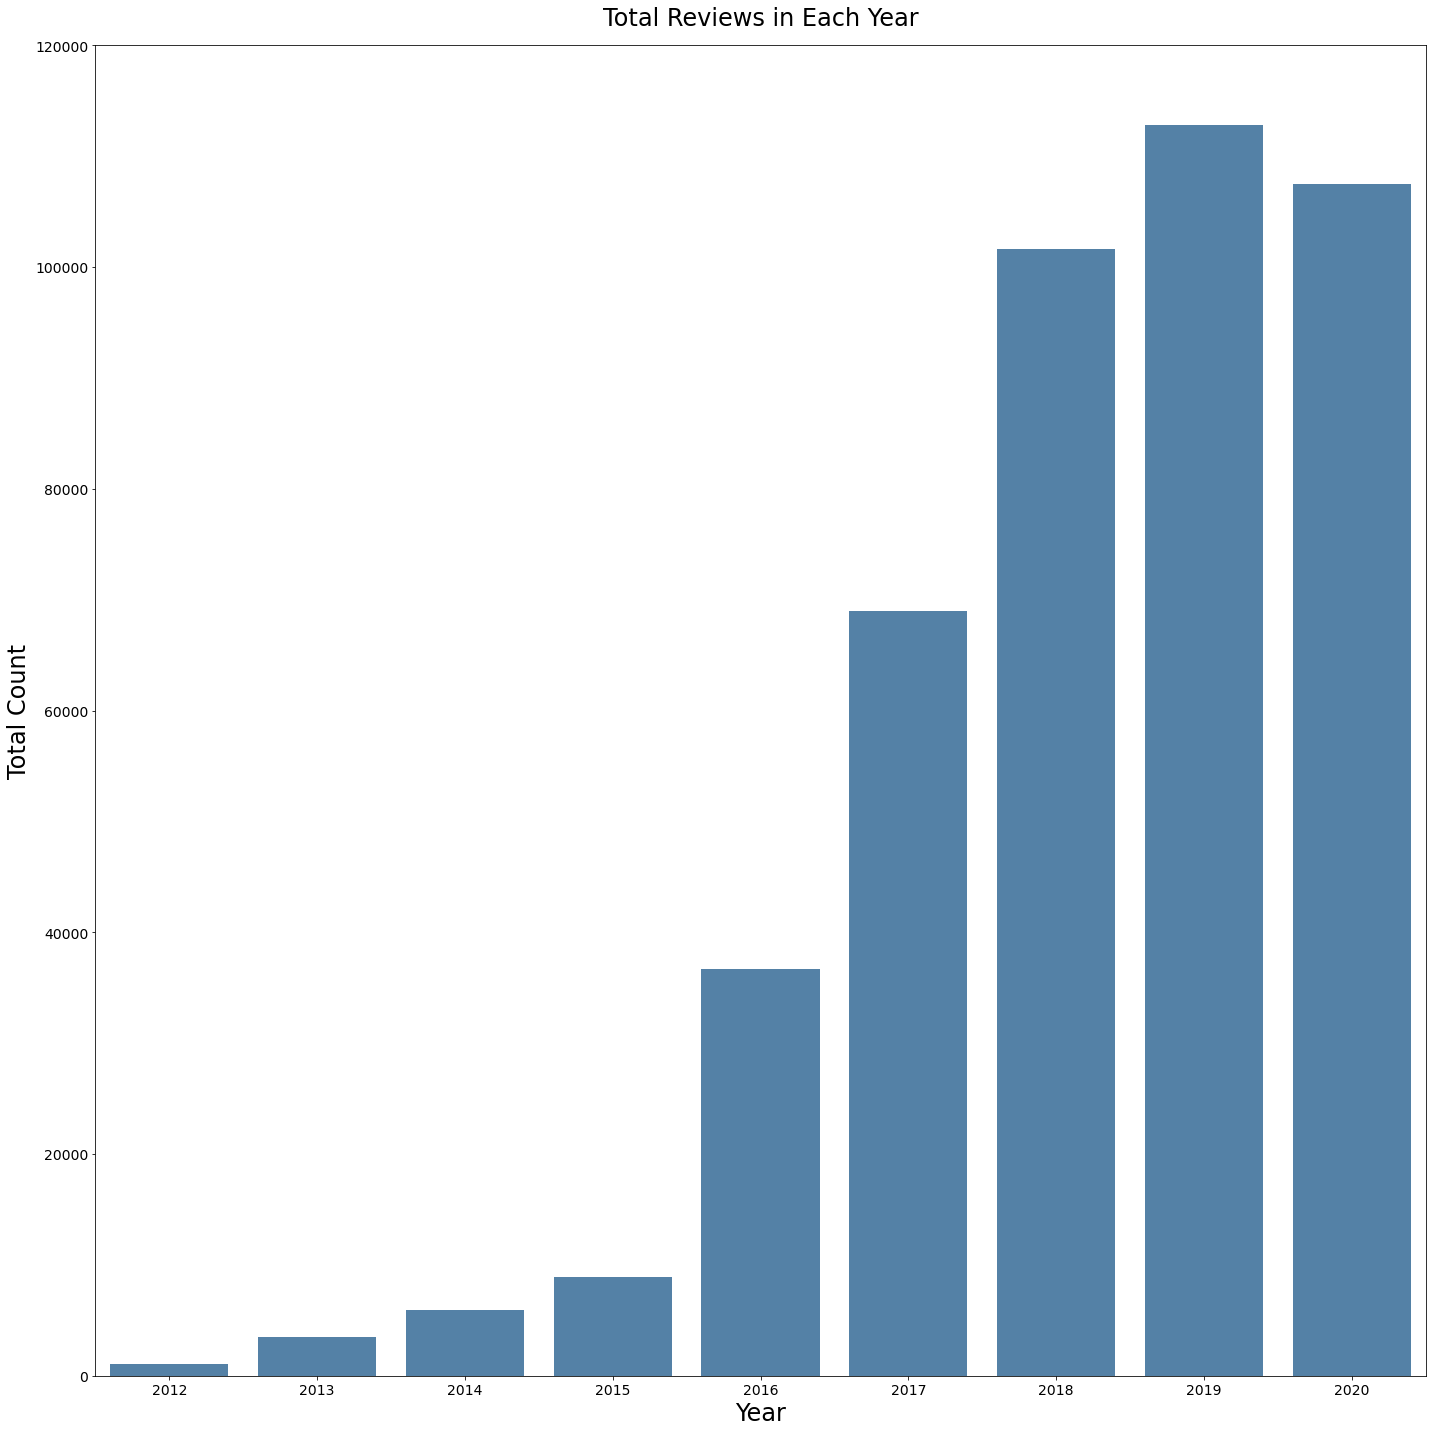

In [65]:
plt.figure(figsize=(20, 20))

############# Bar Graph #############
sns.barplot(x=reviews_df['review_date'].dt.year.value_counts().index,
            y=reviews_df['review_date'].dt.year.value_counts(),
            color='steelblue')

# Set title and labels for axes
plt.xlabel("Year", size=24)
plt.ylabel("Total Count", size=24)
plt.title("Total Reviews in Each Year", size=24, pad=20)
plt.yticks(size=14)
plt.xticks(size=14)

# Set axis limits
plt.ylim(0, 120_000)

plt.tight_layout()
plt.show()

We see general trends of year-over-year increases in the total reviews. Note that the total reviews in 2019 looks larger than 2020 but that is a result of total reviews in 2020 ranging up until August.

#### What is the rating distribution?

In [66]:
# Total count of each rating observed
reviews_df['rating'].value_counts().sort_index()

1     16882
2      4742
3      9533
4     36641
5    379175
Name: rating, dtype: int64

In [67]:
# Total proportion of each rating observed, in percentage
round(reviews_df['rating'].value_counts(normalize = True) * 100, 2).sort_index()

1     3.78
2     1.06
3     2.13
4     8.20
5    84.83
Name: rating, dtype: float64

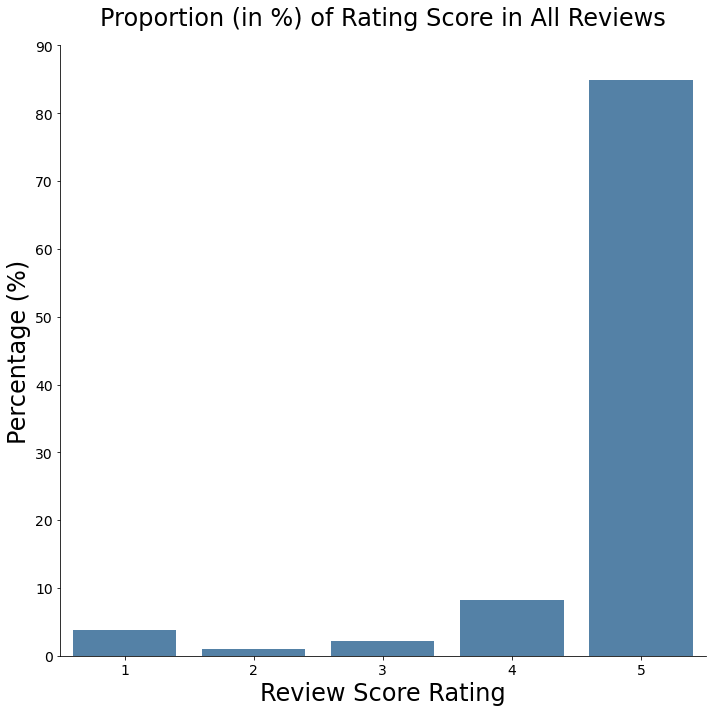

<Figure size 432x288 with 0 Axes>

In [68]:
plt.figure(figsize=(10, 10))

############# Bar Graph #############
sns.barplot(x=reviews_df['rating'].value_counts().index,
            y=round(reviews_df['rating'].value_counts(normalize = True) * 100, 2),
            color='steelblue')

# Set title and labels for axes
plt.xlabel("Review Score Rating", size=24)
plt.ylabel("Percentage (%)", size=24)
plt.title("Proportion (in %) of Rating Score in All Reviews",
          size=24,
          pad=20)
plt.yticks(size = 14)
plt.xticks(size = 14)

# Set axis limits
plt.ylim(0, 90)

# Remove top and right borders
sns.despine()

plt.tight_layout()
plt.show()

# Save figure
plt.savefig('ratings.png', dpi=300, bbox_inches='tight')

We see a left-skewed distribution in the review ratings, with $\approx$ 85% of reviews rated 5 stars.

#### What is the distribution of positive and negative reviews?

In [69]:
# Create a new column titled 'is_review_good' and label any
# row with a star rating of 4 and above a 1 or 'positive'. 
# Ratings 3 and below are labeled 0 or 'negative'
reviews_df['is_review_good'] = np.where(reviews_df['rating'] >= 4, 1, 0)

In [70]:
# Total proportion of positive and negative reviews observed
reviews_df['is_review_good'].value_counts().sort_index()

0     31157
1    415816
Name: is_review_good, dtype: int64

In [71]:
# Total proportion of positive and negative reviews observed, in percentage
round(reviews_df['is_review_good'].value_counts(normalize = True) * 100, 2).sort_index()

0     6.97
1    93.03
Name: is_review_good, dtype: float64

In [72]:
# Create new variable for the plot below
good_reviews = reviews_df['is_review_good'].value_counts(normalize = True).sort_index().rename({0: 'Negative', 1: 'Positive' })

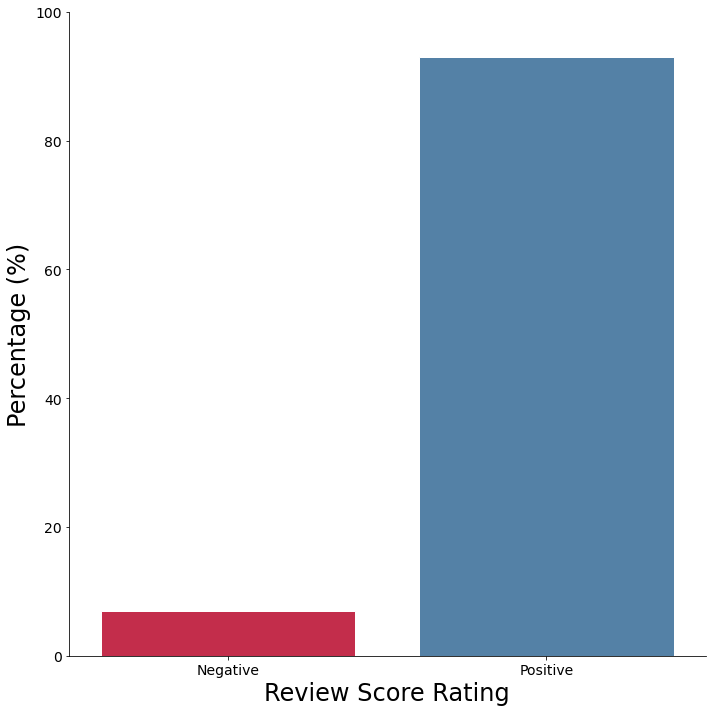

In [73]:
plt.figure(figsize=(10, 10))

############# Bar Graph #############
sns.barplot(x=good_reviews.index,
            y=good_reviews * 100,
            palette=["crimson","steelblue"],
            edgecolor="1.0")

# Set title and labels for axes
plt.xlabel("Review Score Rating", size=24)
plt.ylabel("Percentage (%)", size=24)
# plt.title("Proportion (in %) of Positive and Negative Reviews",
#           size=24,
#           pad=20)
plt.yticks(size = 14)
plt.xticks(size = 14)

# Set axis limits
plt.ylim(0, 100)

# Remove top and right borders
sns.despine()

plt.tight_layout()

# Save figure
# plt.savefig('ratings.svg', dpi=300, bbox_inches='tight')
# plt.savefig('destination_path.eps', format='eps')
plt.show()

Categorizing reviews as positive and negative resulted in $\approx$ 93% of positive reviews and $\approx$ 7% of negative reviews for this dataset.

#### What is the distribution of reviews across apps?

In [74]:
# Obtain descriptive statistics of the reviews observed across
# each app
reviews_df['app_name'].value_counts().describe()

count     3701.000000
mean       120.770873
std        600.580519
min          1.000000
25%          3.000000
50%         11.000000
75%         54.000000
max      24274.000000
Name: app_name, dtype: float64

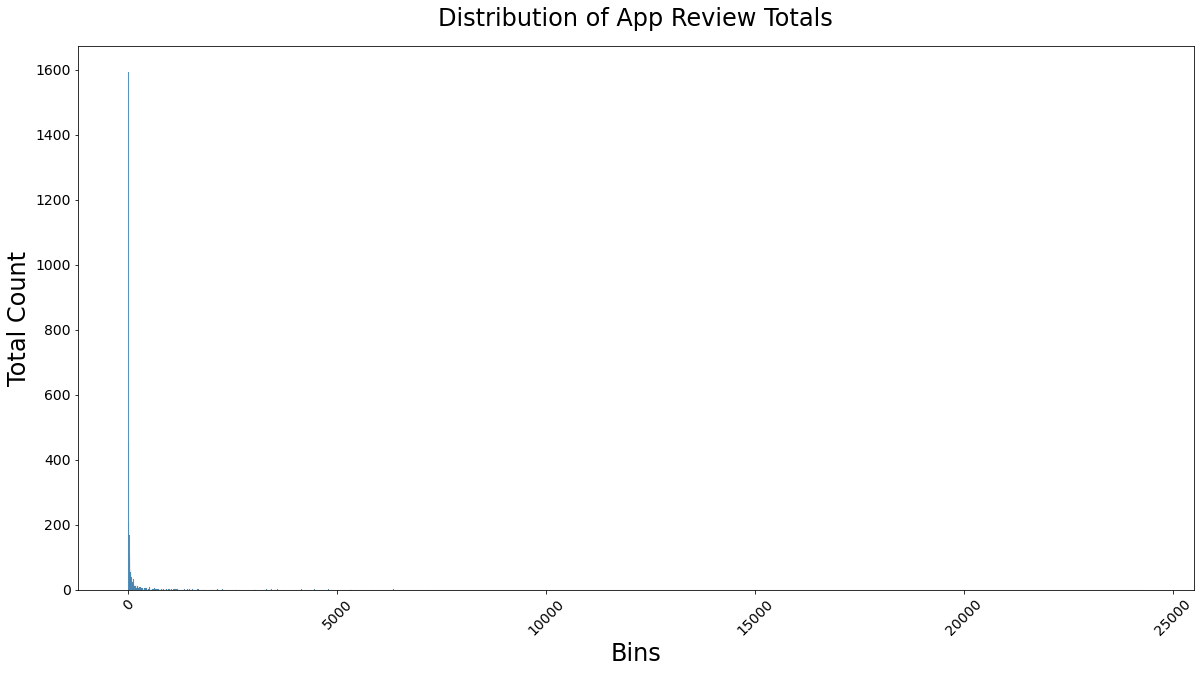

In [75]:
plt.figure(figsize=(20, 10))

############# Histogram #############
sns.histplot(reviews_df['app_name'].value_counts())

# Set title and labels for axes
plt.xlabel("Bins", size=24)
plt.ylabel("Total Count", size=24)
plt.title("Distribution of App Review Totals", size=24, pad=20)

# Set axes ticks
plt.xticks(rotation=45, size=14)
plt.yticks(size=14)

plt.show()

I see that there are outliers influencing the resolution to the graph. Specifically, I have an app that received $\approx$ 24,000 reviews. However, the mean of review counts are 120; way below the max. In contrast, the median or 50%ile is at 11 reviews. Let's take a closer look at review count distribution at 500 and below.

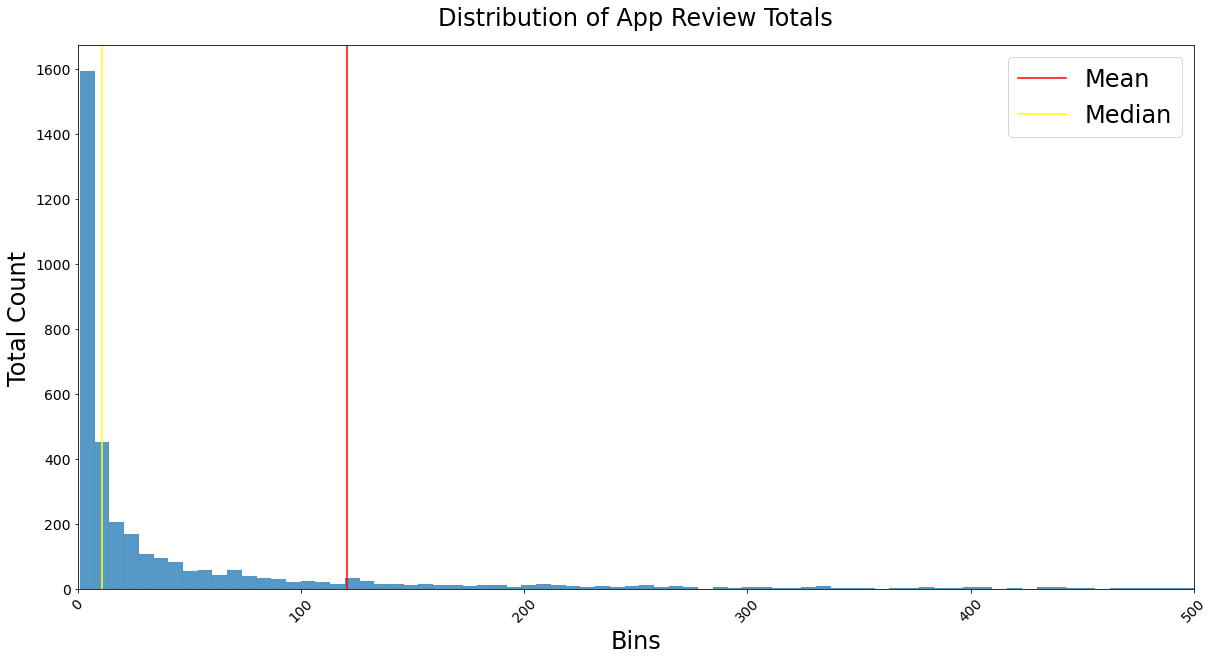

In [76]:
plt.figure(figsize=(20, 10))

############# Histogram #############
sns.histplot(reviews_df['app_name'].value_counts())

# Set title and labels for axes
plt.xlabel("Bins", size=24)
plt.ylabel("Total Count", size=24)
plt.title("Distribution of App Review Totals", size=24, pad=20)

# Set axes ticks
plt.xticks(rotation=45, size=14)
plt.yticks(size=14)

# Set axes limits
plt.xlim(0, 500)

# Plot mean and median
plt.axvline(np.mean(reviews_df['app_name'].value_counts()), color="red", label="Mean")
plt.axvline(np.median(reviews_df['app_name'].value_counts()), color="yellow", label="Median")

# Show legend
plt.legend(fontsize = 24)

plt.show()

Based on the distribution and values of the mean and median, I can see that the dataset is a right-skewed distribution for total review counts across apps.

#### What are the top 10 apps with most developer responses?

In [77]:
# Obtain all reviews with 'dev_reply_text' cell filled out and count
# the total rows with the developer responses for each unique app 
# and assign it to a new variable
top_10_dev_reply = reviews_df.loc[np.where(reviews_df['dev_reply_text'].notna()), 'app_name'].value_counts()

In [78]:
# Proportion of total developer responses accounted for by the top 10 apps with
# most developer responses, in percentage
round(top_10_dev_reply.head(10).sum() / top_10_dev_reply.sum(), 2) * 100

26.0

The top 10 apps with most developer responses accounted for $\approx$ 26% of total developer responses observed.

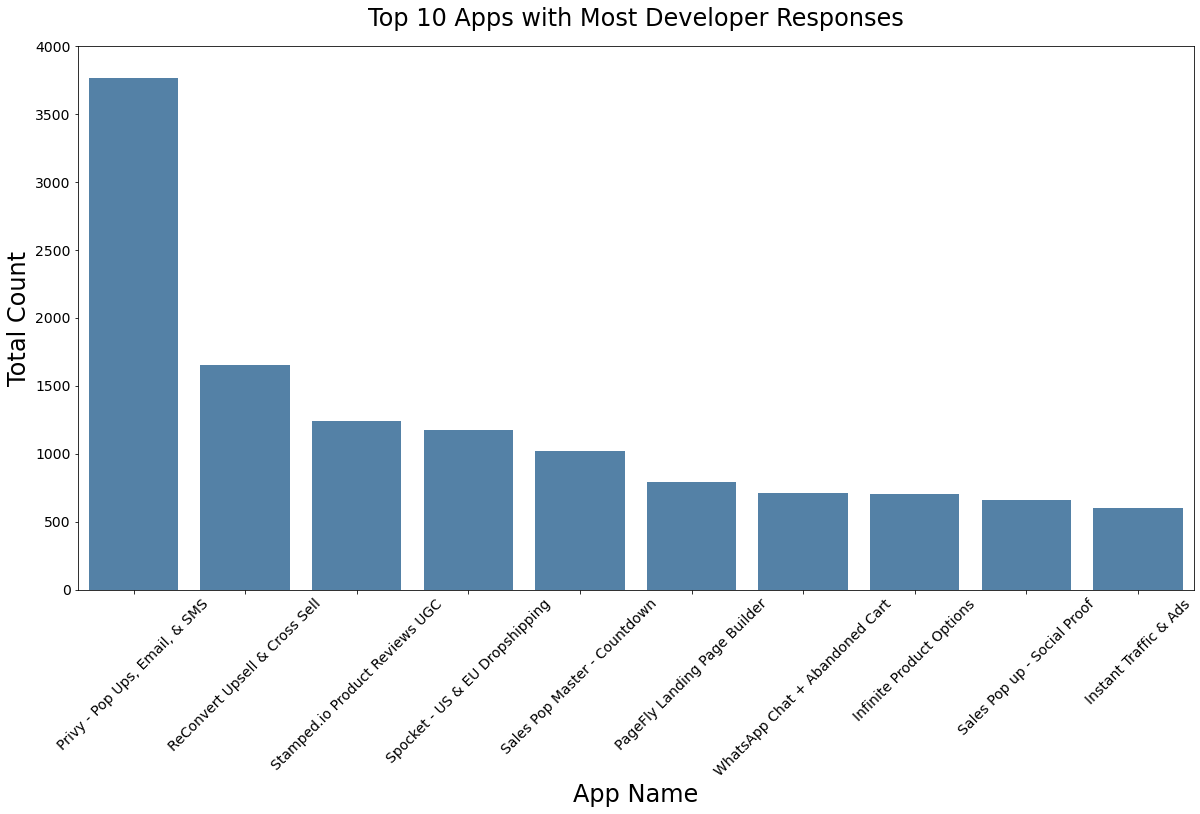

In [79]:
plt.figure(figsize = (20,10))

############# Bar Graph #############
sns.barplot(x=top_10_dev_reply.head(10).index,
            y=top_10_dev_reply.head(10).values,
            color='steelblue')

# Set title and labels for axes
plt.xlabel("App Name", size=24)
plt.ylabel("Total Count", size=24)
plt.title("Top 10 Apps with Most Developer Responses",
          size=24,
          pad=20)

# Set axes ticks
plt.xticks(rotation=45, size = 14)
plt.yticks(size = 14)

# Set axes limits
plt.ylim(0, 4_000)

plt.show()


In [80]:
# The top 10 apps with the most developer responses;
# sorted alphabetical order
top_10_dev_reply.head(10).sort_index().index

Index(['Infinite Product Options', 'Instant Traffic & Ads',
       'PageFly Landing Page Builder', 'Privy ‑ Pop Ups, Email, & SMS',
       'ReConvert Upsell & Cross Sell', 'Sales Pop Master ‑ Countdown',
       'Sales Pop up ‑ Social Proof', 'Spocket ‑ US & EU Dropshipping',
       'Stamped.io Product Reviews UGC', 'WhatsApp Chat + Abandoned Cart'],
      dtype='object')

The app with the most developer responses is `Privy ‑ Pop Ups, Email, & SMS`.

- The top 10 apps with the most developer replies accounted for $\approx$ 26% of all developer responses.
    - These apps were (in alphabetical order):
        - `Infinite Product Options`
        - `Instant Traffic & Ads`
        - `PageFly Landing Page Builder`
        - `Privy ‑ Pop Ups, Email, & SMS`
        - `ReConvert Upsell & Cross Sell`
        - `Sales Pop Master ‑ Countdown`
        - `Sales Pop up ‑ Social Proof`
        - `Spocket ‑ US & EU Dropshipping`
        - `Stamped.io Product Reviews UGC`
        - `WhatsApp Chat + Abandoned Cart`

#### What are the top 10 reviewed apps?

In [81]:
# Obtain count of total reviews observed for each unique app and assign it to a 
# new variable
top_10_most_reviews = reviews_df['app_name'].value_counts().head(10)

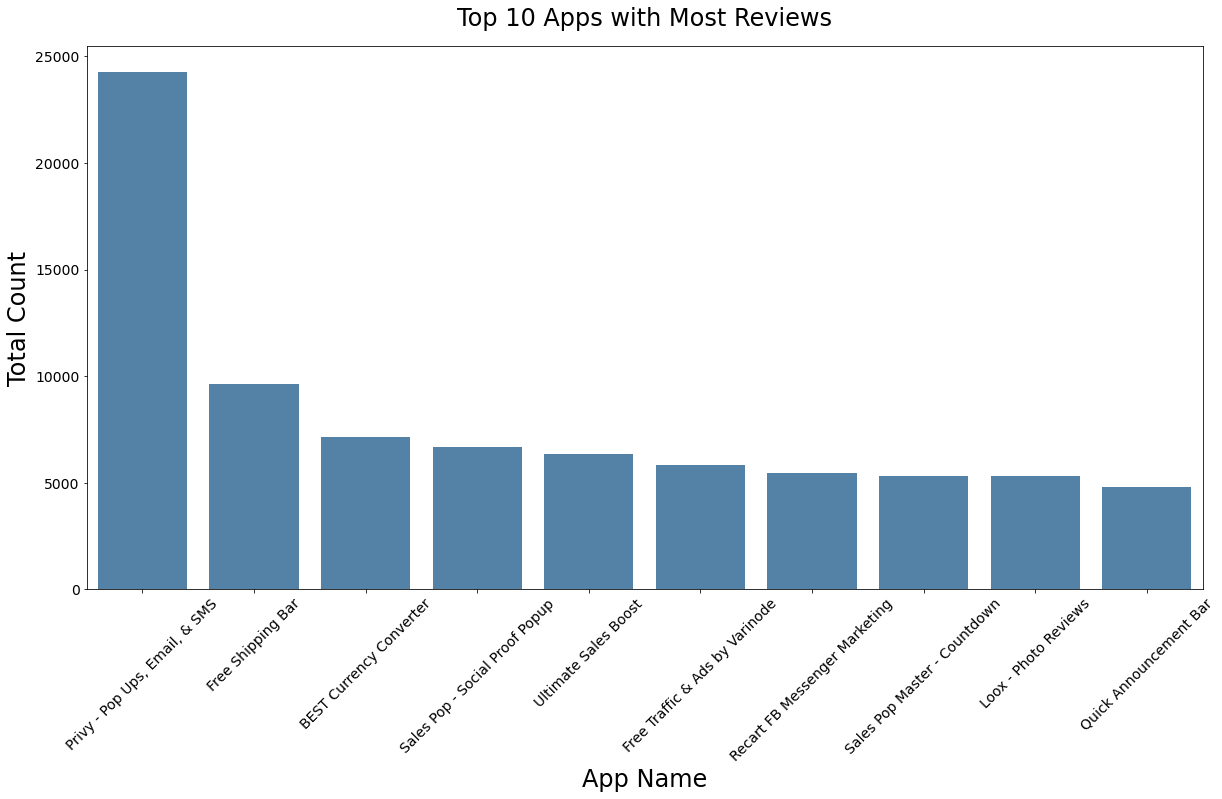

In [82]:
plt.figure(figsize = (20,10))

############# Bar Graph #############
sns.barplot(x=top_10_most_reviews.index,
            y=top_10_most_reviews.values,
            color='steelblue')

# Set title and labels for axes
plt.xlabel("App Name", size=24)
plt.ylabel("Total Count", size=24)
plt.title("Top 10 Apps with Most Reviews",
          size=24,
          pad=20)

# Set axes ticks
plt.xticks(rotation=45, size = 14)
plt.yticks(size = 14)

plt.show()

The app with the most reviews is also `Privy ‑ Pop Ups, Email, & SMS`.

In [83]:
# The top 10 reviewed apps in alphabetical order
top_10_most_reviews.head(10).sort_index().index

Index(['BEST Currency Converter', 'Free Shipping Bar',
       'Free Traffic & Ads by Varinode', 'Loox ‑ Photo Reviews',
       'Privy ‑ Pop Ups, Email, & SMS', 'Quick Announcement Bar',
       'Recart FB Messenger Marketing', 'Sales Pop Master ‑ Countdown',
       'Sales Pop ‑ Social Proof Popup', 'Ultimate Sales Boost'],
      dtype='object')

#### What are the top 10 highly rated apps?

In [84]:
# Obtain count of total 5-star rating reviews observed for each unique app 
# and assign it to a new variable
top_10_highly_rated = reviews_df.loc[reviews_df['rating'] == 5, 'app_name'].value_counts().head(10)

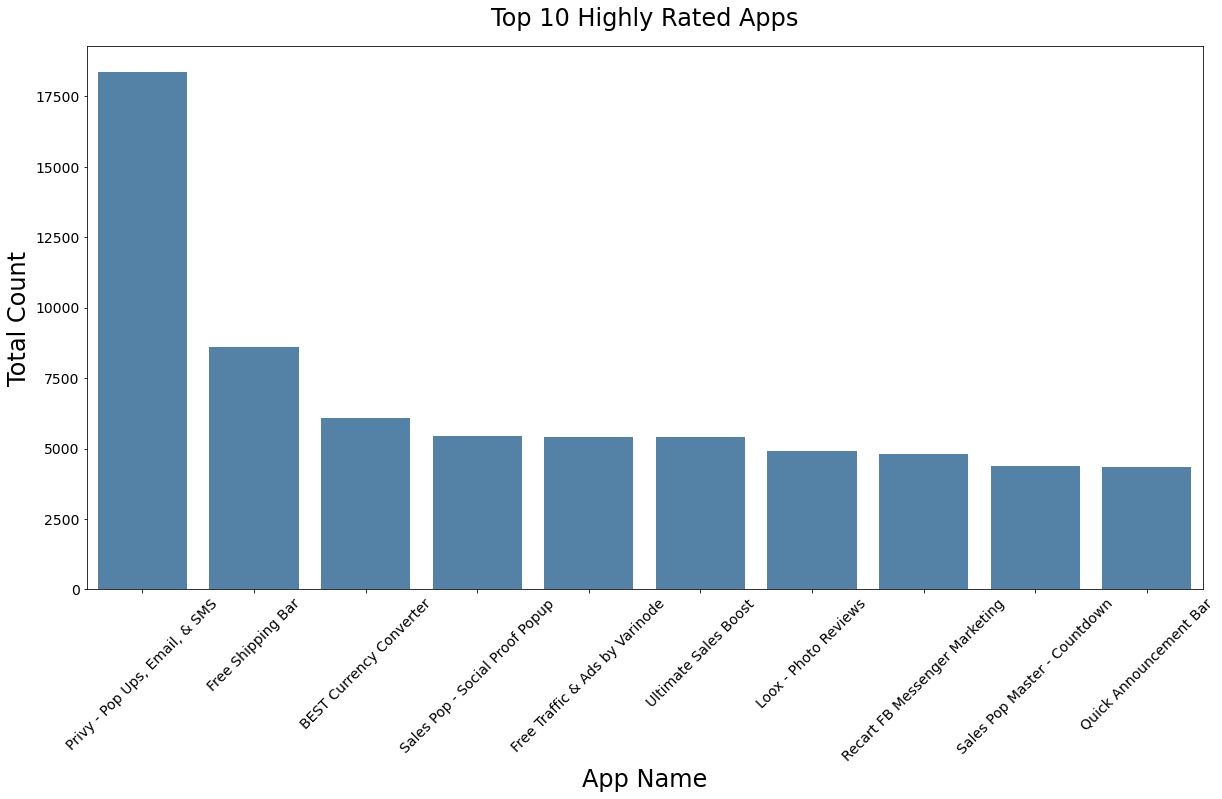

In [85]:
plt.figure(figsize = (20,10))

############# Bar Graph #############
sns.barplot(x=top_10_highly_rated.index,
            y=top_10_highly_rated.values,
            color='steelblue')

# Set title and labels for axes
plt.xlabel("App Name", size=24)
plt.ylabel("Total Count", size=24)
plt.title("Top 10 Highly Rated Apps",
          size=24,
          pad=20)

# Set axes ticks
plt.xticks(rotation=45, size = 14)
plt.yticks(size = 14)

plt.show()

In [86]:
# The top 10 highly rated apps in alphabetical order
top_10_highly_rated.head(10).sort_index().index

Index(['BEST Currency Converter', 'Free Shipping Bar',
       'Free Traffic & Ads by Varinode', 'Loox ‑ Photo Reviews',
       'Privy ‑ Pop Ups, Email, & SMS', 'Quick Announcement Bar',
       'Recart FB Messenger Marketing', 'Sales Pop Master ‑ Countdown',
       'Sales Pop ‑ Social Proof Popup', 'Ultimate Sales Boost'],
      dtype='object')

Again, `Privy ‑ Pop Ups, Email, & SMS` is the top highly rated app (i.e., most reviews with 5-stars) and the app with the most reviews. Interestingly, that information is proudly marketed on their [website](https://www.privy.com/), providing more confidence in the validity to the Kaggle dataset.

In [87]:
# Compare the names of the top 10 highly rated apps and top 10 highly reviewed apps
# to see if the top 10 lists correspond to the same apps
top_10_highly_rated.head(10).sort_index().index == top_10_most_reviews.head(10).sort_index().index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Furthermore, the 10 apps with the most reviews and the 10 apps with the most 5-star rating reviews were in the top 10 list for both categories.

The top 10 apps with the most reviews and the top 10 apps that are highly rated (i.e., most 5-star ratings) were identical in that the apps were in the top 10 of both categories.
- These apps were (in alphabetical order):
        - `BEST Currency Converter`
        - `Free Shipping Bar`
        - `Free Traffic & Ads by Varinode`
        - `Loox ‑ Photo Reviews`
        - `Privy ‑ Pop Ups, Email, & SMS`
        - `Quick Announcement Bar`
        - `Recart FB Messenger Marketing`
        - `Sales Pop Master ‑ Countdown`
        - `Sales Pop ‑ Social Proof Popup`
        - `Ultimate Sales Boost`

### EDA on `reviews_df_merged`

Here I am using the `reviews_df_merged` dataframe where the data points grew in size because of the mapping of categories to apps such that apps can have multiple categories.

#### What is the distribution of total reviews across different app categories?

In [88]:
# Obtain count of total reviews observed for each unique app category 
# and assign it to a new variable
total_reviews_per_category = reviews_df_merged['category_name'].value_counts()

In [89]:
total_reviews_per_category

Store design                         267141
Sales and conversion optimization    193884
Marketing                            187113
Orders and shipping                   37066
Customer support                      28663
Finding and adding products           26272
Reporting                             14083
Productivity                          13181
Inventory management                  13162
Places to sell                        11092
Trust and security                    10596
Finances                               6307
Name: category_name, dtype: int64

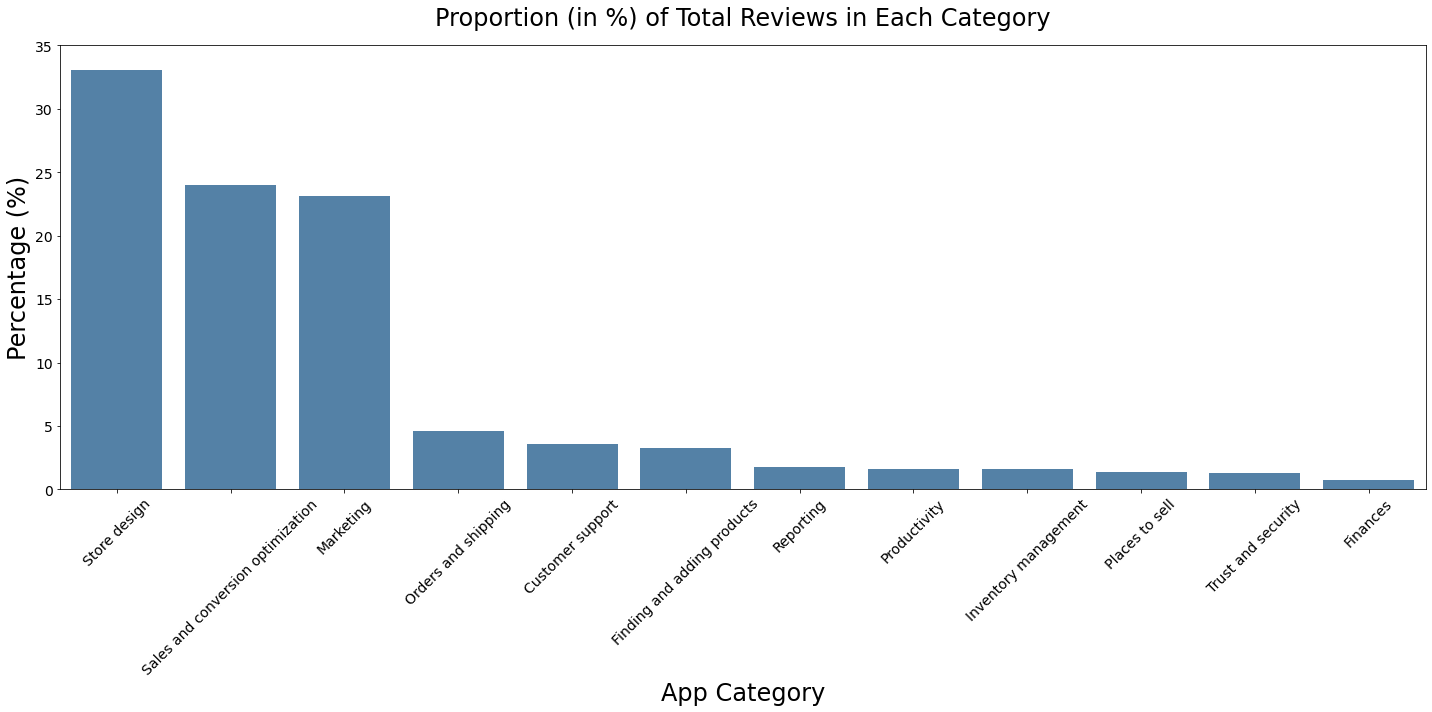

In [90]:
plt.figure(figsize = (20,10))

############# Bar Graph #############
sns.barplot(x=reviews_df_merged['category_name'].value_counts().index,
            y=round(reviews_df_merged['category_name'].value_counts(normalize = True) * 100, 2),
            color='steelblue')

# Set title and labels for axes
plt.xlabel("App Category", size=24)
plt.ylabel("Percentage (%)", size=24)
plt.title("Proportion (in %) of Total Reviews in Each Category",
          size=24,
          pad=20)

# Set axes ticks
plt.xticks(rotation = 45, size = 14)
plt.yticks(size = 14)

# Set axes limits
plt.ylim(0, 35)
    
    
plt.tight_layout()
plt.show()

We can see that the most popular app categories at the time of the gathered dataset were: store design, sales and conversion optimization, and marketing. However, due to the data merging and duplication of reviews along with multiple apps consisting of multiple categories, this interpretation is cautioned. The cells below will further explore the total unique reviews observed for specific app category(ies).

#### What is the most common category or combination of categories across the apps?

In [91]:
# Group the data by app name and its' corresponding category(ies) and
# modify the 'category_name' column such that if an app has multiple categories,
# it would be a string that is concatenated to present the category combination for
# the app in a single row
apps_categories_df = pd.DataFrame(reviews_df_merged.groupby('app_name')['category_name'].\
                                  unique().apply(', '.join)).reset_index()

In [92]:
# Glimpse of the first 5 rows of subsetted dataframe
apps_categories_df.head()

,app_name,category_name
0,AdBlock Blocker,Store design
1,Marketplace in a Box,Sales and conversion optimization
2,Product Labels & Badges,Store design
3,#1 Bundle Upsell by PickyStory,"Store design, Sales and conversion optimization"
4,#1 Facebook Feed & Google Feed,"Sales and conversion optimization, Reporting, ..."


In [93]:
# Check for missing values
apps_categories_df.isna().sum()

app_name         0
category_name    0
dtype: int64

In [94]:
# Check for duplicated app names
apps_categories_df[apps_categories_df['app_name'].duplicated()].count()

app_name         0
category_name    0
dtype: int64

In [95]:
# Count the total number of apps with specific category(ies) and show top 10
# common categories across apps
apps_categories_df['category_name'].value_counts().head(10)

Store design                                                  763
Store design, Sales and conversion optimization               334
Orders and shipping                                           286
Marketing                                                     271
Sales and conversion optimization                             255
Store design, Marketing                                       186
Finding and adding products                                   156
Store design, Sales and conversion optimization, Marketing    113
Sales and conversion optimization, Marketing                  107
Customer support                                              100
Name: category_name, dtype: int64

#### What is the category or combination of categories with the most reviews? 

To obtain the total unique reviews observed for a particular app category(ies), I will use the `reviews_df` dataframe along with the recently created `apps_categories_df` to analyze the most reviews observed for a particular category(ies) available across the apps. 

In [96]:
# Create a new dataframe with the total reviews for each app using the 'reviews_df'
# and name the column with total review count as 'total_reviews' and reset the
# index
total_reviews_across_apps = reviews_df.value_counts('app_name').\
                            to_frame().rename(columns = {0:'total_reviews'}).reset_index()

In [97]:
# Glimpse of the first 5 rows
total_reviews_across_apps.head()

,app_name,total_reviews
0,"Privy ‑ Pop Ups, Email, & SMS",24274
1,Free Shipping Bar,9615
2,BEST Currency Converter,7171
3,Sales Pop ‑ Social Proof Popup,6699
4,Ultimate Sales Boost,6340


In [98]:
# Merge the total_reviews_across_apps dataframe and the apps_categories_df dataframe
# by using the column 'app_name' that is common between both 
apps_categories_total_reviews_df = apps_categories_df.merge(total_reviews_across_apps, on='app_name')

In [99]:
apps_categories_total_reviews_df.head()

,app_name,category_name,total_reviews
0,AdBlock Blocker,Store design,1
1,Marketplace in a Box,Sales and conversion optimization,11
2,Product Labels & Badges,Store design,9
3,#1 Bundle Upsell by PickyStory,"Store design, Sales and conversion optimization",40
4,#1 Facebook Feed & Google Feed,"Sales and conversion optimization, Reporting, ...",17


In [100]:
# Get the total sum of unique reviews observed for each unique category(ies) 
# observed across all the apps and show the top 10 category(ies) with the
# most reviews observed
top_10_categories_total_reviews = apps_categories_total_reviews_df.groupby('category_name')[['total_reviews']].sum().\
                                  sort_values(by = 'total_reviews', ascending = False).head(10).reset_index()

In [101]:
top_10_categories_total_reviews.head(10)

,category_name,total_reviews
0,Store design,73494
1,"Store design, Sales and conversion optimizatio...",70364
2,"Store design, Sales and conversion optimization",60159
3,Marketing,36946
4,"Store design, Marketing",30718
5,"Sales and conversion optimization, Marketing",24418
6,Finding and adding products,22814
7,Sales and conversion optimization,20394
8,Orders and shipping,15223
9,"Store design, Trust and security",6472


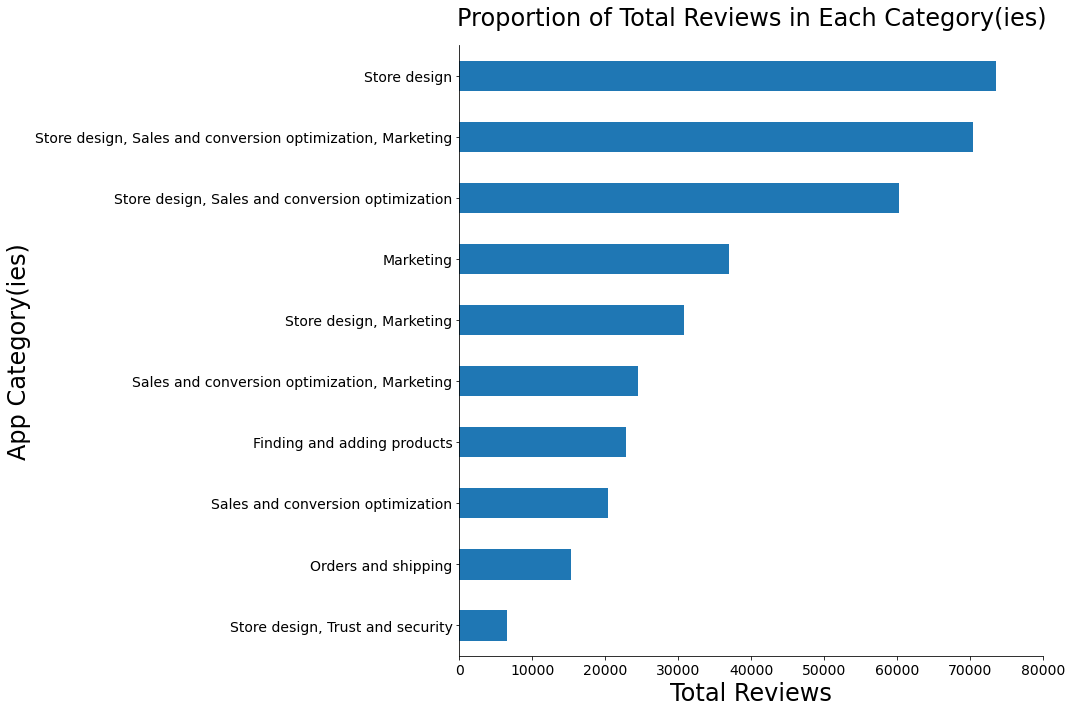

In [102]:
############# Horizontal Bar Graph #############
data = top_10_categories_total_reviews['total_reviews'].values
df = pd.DataFrame(data,columns=['total_reviews'], index = top_10_categories_total_reviews['category_name'])

df.sort_values(by = 'total_reviews', ascending = True).plot.barh(figsize = (15,10), legend=None)

# Set title and labels for axes
plt.ylabel("App Category(ies)", size=24)
plt.xlabel("Total Reviews", size=24)
plt.title("Proportion of Total Reviews in Each Category(ies)",
          size=24,
          pad=20)

# Set axes ticks
plt.xticks(size = 14)
plt.yticks(size = 14)

# Set axes limits
plt.xlim(0, 80_000)

# Remove top and right borders
sns.despine()
    
plt.tight_layout()
plt.show()

The total unique reviews accumulated and observed for a particular category or combination of categories across apps is highest ($\approx$ 73,000 or $\approx$ 17% of all reviews) for the `Store Design` category. Interestingly, apps with a combination of these 2-3 categories achieved the second (`Store design, Sales and conversion optimization, Marketing`; $\approx$ 70,000 or $\approx$ 16%) and third (`Store design, Sales and conversion optimization`; $\approx$ 60,000 or $\approx$ 14%) highest total reviews. This indicates the importance of `Store Design`, `Sales and conversion optimization`, and `Marketing` app functionalities/capabilities to users/merchants in the Shopify App Store ecosystem and the large interest for apps with combinations of the aforementioned categories.

## Developer Responses EDA Continued
***
<a id='dev_responses_eda_2'></a>

The initial EDA of calculating the proportion of developer responses to reviews in 2019 and 2020 can be found [here](#dev_responses_eda_1).

### Proportion of Developer Responses for Positive and Negative Reviews in 2019

Developer responses were only observed in 2019 and onwards. The proportion of developer responses to positive and negative reviews is calculated for the year 2019.

In [103]:
# Subset reviews to only those observed in 2019
reviews_2019_only = reviews_df[(reviews_df['review_date'].dt.year == 2019)]

In [104]:
# Print the first 5 rows 
reviews_2019_only.head()

,app_name,author,rating,review_date,review_text,helpful_count,dev_reply_text,dev_reply_date,is_review_good
25,Instant Search +,Pushchair Expert,5,2019-12-09,Excellent search module. The best out there. F...,0,NaN,NaT,1
26,Instant Search +,Total Restroom,5,2019-12-04,After looking for a great search and filter re...,1,NaN,NaT,1
27,Instant Search +,Movatik,5,2019-10-25,Great app with a lot of features and very cust...,0,NaN,NaT,1
28,Instant Search +,AZ-Delivery,5,2019-10-07,Great costumer support! Really helpful for ins...,0,NaN,NaT,1
29,Instant Search +,Jake 'n' Jasp,4,2019-09-17,I used this app . It's useful. I had few issue...,0,NaN,NaT,1


I will now separate total reviews and total reviews with developers response by positive and negative classes.

In [105]:
# Group data by positive/negative reviews with the following columns:
# total count of reviews and total count of reviews with developer responses
reviews_2019_only_pptn_dev_reply = reviews_2019_only.groupby('is_review_good')[['review_text','dev_reply_text']].count()

In [106]:
# Print the dataframe
reviews_2019_only_pptn_dev_reply

,review_text,dev_reply_text
is_review_good,,
0,9196,4258
1,103586,16298


In [107]:
# Rename columns for improved understanding
reviews_2019_only_pptn_dev_reply.rename(columns = {'review_text':'total_reviews', 'dev_reply_text':'total_dev_replies'},\
                                        inplace = True)

In [108]:
# Print the dataframe with updated column names
reviews_2019_only_pptn_dev_reply

,total_reviews,total_dev_replies
is_review_good,,
0,9196,4258
1,103586,16298


In [109]:
# Calculate proportions across columns as percentages to observe the proportion of total 
# negative/positive reviews and total negative/positive reviews with developer responses

# https://stackoverflow.com/questions/23377108/pandas-percentage-of-total-with-groupby

# axis=0: apply calculation “column-wise”
reviews_2019_only_pptn_dev_reply.apply(lambda x: round(x / x.sum() * 100, 1), axis = 0).\
rename(columns = {'total_reviews':'pct_total_reviews', 'total_dev_replies':'pct_total_dev_replies'})

,pct_total_reviews,pct_total_dev_replies
is_review_good,,
0,8.2,20.7
1,91.8,79.3


In 2019, $\approx$ 92% of reviews were positive and $\approx$ 8% of reviews were negative. Of all the developer responses observed, $\approx$ 21% were dedicated to negative reviews, whereas $\approx$ 79% were for positive reviews.

In [110]:
# Calculate proportions across rows as percentages to observe the proportion
# of negative/positive reviews with or without developer responses

# axis=1: apply calculation “row-wise”; rename columns
reviews_2019_only_pptn_dev_reply.apply(lambda x: round(x / x.max() * 100, 1), axis = 1).\
rename(columns = {'total_reviews':'pct_reviews_no_dev_reply', 'total_dev_replies':'pct_reviews_with_dev_reply'})

,pct_reviews_no_dev_reply,pct_reviews_with_dev_reply
is_review_good,,
0,100.0,46.3
1,100.0,15.7


Approximately $\approx$ 46% of negative reviews received developer responses, whereas $\approx$ 16% of positive reviews received developer responses.

### Proportion of Developer Responses for Positive and Negative Reviews in 2020

In [111]:
# Subset reviews to only those observed in 2020
reviews_2020_only = reviews_df[(reviews_df['review_date'].dt.year == 2020)]

In [112]:
# Print the first 5 rows 
reviews_2020_only.head()

,app_name,author,rating,review_date,review_text,helpful_count,dev_reply_text,dev_reply_date,is_review_good
0,Instant Search +,Consuela,5,2020-08-06,Great and super fast customer service! Highly ...,0,NaN,NaT,1
1,Instant Search +,L'Atelier Global,5,2020-08-04,"Still setting up my store, and after initially...",0,NaN,NaT,1
2,Instant Search +,city'super E-Shop,5,2020-08-04,"This is an excellent search app, which they ha...",0,NaN,NaT,1
3,Instant Search +,PortableHandwashing.com,5,2020-07-30,"A+, great great great customer service! thanks...",0,NaN,NaT,1
4,Instant Search +,ICCTUNING,5,2020-07-28,"I'm begginig to use this app, the search engin...",0,NaN,NaT,1


In [113]:
# Group data by positive/negative reviews with the following columns:
# total count of reviews and total count of reviews with developer responses
reviews_2020_only_pptn_dev_reply = reviews_2020_only.groupby('is_review_good')[['review_text','dev_reply_text']].count()

In [114]:
reviews_2020_only_pptn_dev_reply.rename(columns = {'review_text':'total_reviews', 'dev_reply_text':'total_dev_replies'})

,total_reviews,total_dev_replies
is_review_good,,
0,7851,4151
1,99632,20904


In [115]:
# Calculate proportions across columns as percentages to observe the proportion of total 
# negative/positive reviews and total negative/positive reviews with developer responses

# axis=0: apply calculation “column-wise”
reviews_2020_only_pptn_dev_reply.apply(lambda x: round(x / x.sum() * 100, 1), axis = 0).\
rename(columns = {'review_text':'pct_total_reviews', 'dev_reply_text':'pct_total_dev_replies'})

,pct_total_reviews,pct_total_dev_replies
is_review_good,,
0,7.3,16.6
1,92.7,83.4


In 2020 (up until August), $\approx$ 93% of reviews were positive and $\approx$ 7% of reviews were negative. Of all the developer responses observed, $\approx$ 16.6% were dedicated to negative reviews, whereas $\approx$ 83.4% were for positive reviews.

In [116]:
# Calculate proportions across rows as percentages to observe the proportion
# of negative/positive reviews with or without developer responses

# axis=1: apply calculation “row-wise”; rename columns
reviews_2020_only_pptn_dev_reply.apply(lambda x: round(x / x.max() * 100, 1), axis = 1).\
rename(columns = {'review_text':'pct_reviews_no_dev_reply', 'dev_reply_text':'pct_reviews_with_dev_reply'})

,pct_reviews_no_dev_reply,pct_reviews_with_dev_reply
is_review_good,,
0,100.0,52.9
1,100.0,21.0


Furthermore, $\approx$ 53% of negative reviews received developer responses, whereas $\approx$ 21% of positive reviews received developer responses.

# Summary
***

Due to the skewed distribution of 5-star ratings across the reviews and the multi-class problem, the dataset was simplified into a binary classification by categorizing ratings 1-3 as negative or bad reviews and ratings 4-5 as positive or good reviews. This simplification resulted in $\approx$ 93% of positive reviews and $\approx$ 7% of negative reviews in the entire dataset.

The class imbalance is of potential concern for this dataset. There is an opportunity to downsample this dataset based on the lowest number of reviews for a particular star rating prior to amalgamating data into a binary classification problem. However, it may be possible that the dataset can be separated out regardless of the class imbalance and this hypothesis will be explored in Part 3 of the Jupyter Notebooks.

In Feb 2019, the first appearance of developer responses were observed in this dataset. The proportion of developer responses to reviews increased $\approx$ 4% from 2019 (19.6%) to 2020 (up until August; 23.7%). The proportion of negative reviews that received developer responses increased $\approx$ 7% from 2019 ($\approx$ 46%) to 2020 ($\approx$ 53%). 


Altogether, approximately $\approx$ 49% (8,409 / 17,047) of negative reviews in 2019-2020 received developer responses. It was previously observed and stated that app developers responding to negative reviews are optional, as described [here](#app_developers_directive). This may explain why not all negative reviews receive developer responses.

Although the proportion of negative reviews (7%) are far below the proportion of positive reviews (93%), only half of all negative reviews are being responded to by app developers. Although the topics that these reviews fall under will be explored in the upcoming notebooks, this opportunity for app developers to address negative reviews may be missed opportunities for addressing high-quality constructive feedback.

Furthermore, given that Shopify's App store is accessible by merchants/users from around the world, multi-language reviews have been observed throughout this data wrangling process. Of particular interest is the interaction of developer responses and the language of the review. This will be explored in Part 2 of the Jupyter Notebooks provided.

Additional data exploration and future analyses can be completed for the following questions below:

- What are the monthly, weekly, and daily reviews that have been observed and the corresponding proportion of developer responses observed?
- Do certain dates of the year (e.g., time of month, time of day, seasonality) possess more reviews than usual? This particular insight could then inform whether more support would be required and on standby to provide developer responses.

## Save  `reviews_df` for Part 2

Due to the commands for saving as .csv files using pandas does not preserve the data types that were originally modified, `pickle` files were created instead and used throughout.

In [117]:
# # Create a pickle file
# reviews_df.to_pickle("reviews_df_part_1.pkl")

In [118]:
# # Create a .csv file
# reviews_df.to_csv('reviews_df_part_1.csv', index = False)